# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Loading MNIST dataset...
finish loading


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
def apply_svd_custom(X_train, X_test, n_components):
    C = np.dot(X_train.T, X_train)
    
    # Perform eigenvalue decomposition on the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(C)
    
    # Sort eigenvalues and eigenvectors by descending order of eigenvalues
    idx = np.argsort(-eigenvalues)
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Select the top n_components eigenvectors
    V_k = eigenvectors[:, :n_components]
    
    # Project both training and testing data onto the reduced dimensional space
    X_train_reduced = np.dot(X_train, V_k)
    X_test_reduced = np.dot(X_test, V_k)
    
    return X_train_reduced, X_test_reduced

## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [4]:
svd_components = [10,30,50,70,90,110,130,150,170,190,210,230,250,270,290]  # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
   
    
   

    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)  # Assuming you have this function
    X_train_svd = np.real(X_train_svd)
    X_test_svd = np.real(X_test_svd)
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    # Store the results
    results.append({
        'components': n_components,
        'accuracy': accuracy,
        'training_time': training_time
    })
    
   
    
    print(results)  
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")



Training models with different levels of SVD preprocessing...
Applying custom SVD with 10 components...


/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[{'components': 10, 'accuracy': 0.802, 'training_time': 0.5378501415252686}]
SVD components: 10, Accuracy: 0.8020, Training time: 0.5379 seconds
Applying custom SVD with 30 components...


/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[{'components': 10, 'accuracy': 0.802, 'training_time': 0.5378501415252686}, {'components': 30, 'accuracy': 0.8924285714285715, 'training_time': 2.0890069007873535}]
SVD components: 30, Accuracy: 0.8924, Training time: 2.0890 seconds
Applying custom SVD with 50 components...


/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[{'components': 10, 'accuracy': 0.802, 'training_time': 0.5378501415252686}, {'components': 30, 'accuracy': 0.8924285714285715, 'training_time': 2.0890069007873535}, {'components': 50, 'accuracy': 0.9085, 'training_time': 7.271774768829346}]
SVD components: 50, Accuracy: 0.9085, Training time: 7.2718 seconds
Applying custom SVD with 70 components...


/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[{'components': 10, 'accuracy': 0.802, 'training_time': 0.5378501415252686}, {'components': 30, 'accuracy': 0.8924285714285715, 'training_time': 2.0890069007873535}, {'components': 50, 'accuracy': 0.9085, 'training_time': 7.271774768829346}, {'components': 70, 'accuracy': 0.9145714285714286, 'training_time': 11.33531403541565}]
SVD components: 70, Accuracy: 0.9146, Training time: 11.3353 seconds
Applying custom SVD with 90 components...


/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[{'components': 10, 'accuracy': 0.802, 'training_time': 0.5378501415252686}, {'components': 30, 'accuracy': 0.8924285714285715, 'training_time': 2.0890069007873535}, {'components': 50, 'accuracy': 0.9085, 'training_time': 7.271774768829346}, {'components': 70, 'accuracy': 0.9145714285714286, 'training_time': 11.33531403541565}, {'components': 90, 'accuracy': 0.9185714285714286, 'training_time': 27.14369297027588}]
SVD components: 90, Accuracy: 0.9186, Training time: 27.1437 seconds
Applying custom SVD with 110 components...


/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[{'components': 10, 'accuracy': 0.802, 'training_time': 0.5378501415252686}, {'components': 30, 'accuracy': 0.8924285714285715, 'training_time': 2.0890069007873535}, {'components': 50, 'accuracy': 0.9085, 'training_time': 7.271774768829346}, {'components': 70, 'accuracy': 0.9145714285714286, 'training_time': 11.33531403541565}, {'components': 90, 'accuracy': 0.9185714285714286, 'training_time': 27.14369297027588}, {'components': 110, 'accuracy': 0.918, 'training_time': 36.653303146362305}]
SVD components: 110, Accuracy: 0.9180, Training time: 36.6533 seconds
Applying custom SVD with 130 components...


/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[{'components': 10, 'accuracy': 0.802, 'training_time': 0.5378501415252686}, {'components': 30, 'accuracy': 0.8924285714285715, 'training_time': 2.0890069007873535}, {'components': 50, 'accuracy': 0.9085, 'training_time': 7.271774768829346}, {'components': 70, 'accuracy': 0.9145714285714286, 'training_time': 11.33531403541565}, {'components': 90, 'accuracy': 0.9185714285714286, 'training_time': 27.14369297027588}, {'components': 110, 'accuracy': 0.918, 'training_time': 36.653303146362305}, {'components': 130, 'accuracy': 0.92, 'training_time': 47.55974721908569}]
SVD components: 130, Accuracy: 0.9200, Training time: 47.5597 seconds
Applying custom SVD with 150 components...


/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[{'components': 10, 'accuracy': 0.802, 'training_time': 0.5378501415252686}, {'components': 30, 'accuracy': 0.8924285714285715, 'training_time': 2.0890069007873535}, {'components': 50, 'accuracy': 0.9085, 'training_time': 7.271774768829346}, {'components': 70, 'accuracy': 0.9145714285714286, 'training_time': 11.33531403541565}, {'components': 90, 'accuracy': 0.9185714285714286, 'training_time': 27.14369297027588}, {'components': 110, 'accuracy': 0.918, 'training_time': 36.653303146362305}, {'components': 130, 'accuracy': 0.92, 'training_time': 47.55974721908569}, {'components': 150, 'accuracy': 0.9197857142857143, 'training_time': 49.169790267944336}]
SVD components: 150, Accuracy: 0.9198, Training time: 49.1698 seconds
Applying custom SVD with 170 components...


/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[{'components': 10, 'accuracy': 0.802, 'training_time': 0.5378501415252686}, {'components': 30, 'accuracy': 0.8924285714285715, 'training_time': 2.0890069007873535}, {'components': 50, 'accuracy': 0.9085, 'training_time': 7.271774768829346}, {'components': 70, 'accuracy': 0.9145714285714286, 'training_time': 11.33531403541565}, {'components': 90, 'accuracy': 0.9185714285714286, 'training_time': 27.14369297027588}, {'components': 110, 'accuracy': 0.918, 'training_time': 36.653303146362305}, {'components': 130, 'accuracy': 0.92, 'training_time': 47.55974721908569}, {'components': 150, 'accuracy': 0.9197857142857143, 'training_time': 49.169790267944336}, {'components': 170, 'accuracy': 0.9212142857142858, 'training_time': 66.67794609069824}]
SVD components: 170, Accuracy: 0.9212, Training time: 66.6779 seconds
Applying custom SVD with 190 components...


/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[{'components': 10, 'accuracy': 0.802, 'training_time': 0.5378501415252686}, {'components': 30, 'accuracy': 0.8924285714285715, 'training_time': 2.0890069007873535}, {'components': 50, 'accuracy': 0.9085, 'training_time': 7.271774768829346}, {'components': 70, 'accuracy': 0.9145714285714286, 'training_time': 11.33531403541565}, {'components': 90, 'accuracy': 0.9185714285714286, 'training_time': 27.14369297027588}, {'components': 110, 'accuracy': 0.918, 'training_time': 36.653303146362305}, {'components': 130, 'accuracy': 0.92, 'training_time': 47.55974721908569}, {'components': 150, 'accuracy': 0.9197857142857143, 'training_time': 49.169790267944336}, {'components': 170, 'accuracy': 0.9212142857142858, 'training_time': 66.67794609069824}, {'components': 190, 'accuracy': 0.9204285714285714, 'training_time': 79.53298282623291}]
SVD components: 190, Accuracy: 0.9204, Training time: 79.5330 seconds
Applying custom SVD with 210 components...


/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[{'components': 10, 'accuracy': 0.802, 'training_time': 0.5378501415252686}, {'components': 30, 'accuracy': 0.8924285714285715, 'training_time': 2.0890069007873535}, {'components': 50, 'accuracy': 0.9085, 'training_time': 7.271774768829346}, {'components': 70, 'accuracy': 0.9145714285714286, 'training_time': 11.33531403541565}, {'components': 90, 'accuracy': 0.9185714285714286, 'training_time': 27.14369297027588}, {'components': 110, 'accuracy': 0.918, 'training_time': 36.653303146362305}, {'components': 130, 'accuracy': 0.92, 'training_time': 47.55974721908569}, {'components': 150, 'accuracy': 0.9197857142857143, 'training_time': 49.169790267944336}, {'components': 170, 'accuracy': 0.9212142857142858, 'training_time': 66.67794609069824}, {'components': 190, 'accuracy': 0.9204285714285714, 'training_time': 79.53298282623291}, {'components': 210, 'accuracy': 0.9211428571428572, 'training_time': 90.61461114883423}]
SVD components: 210, Accuracy: 0.9211, Training time: 90.6146 seconds
App

/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[{'components': 10, 'accuracy': 0.802, 'training_time': 0.5378501415252686}, {'components': 30, 'accuracy': 0.8924285714285715, 'training_time': 2.0890069007873535}, {'components': 50, 'accuracy': 0.9085, 'training_time': 7.271774768829346}, {'components': 70, 'accuracy': 0.9145714285714286, 'training_time': 11.33531403541565}, {'components': 90, 'accuracy': 0.9185714285714286, 'training_time': 27.14369297027588}, {'components': 110, 'accuracy': 0.918, 'training_time': 36.653303146362305}, {'components': 130, 'accuracy': 0.92, 'training_time': 47.55974721908569}, {'components': 150, 'accuracy': 0.9197857142857143, 'training_time': 49.169790267944336}, {'components': 170, 'accuracy': 0.9212142857142858, 'training_time': 66.67794609069824}, {'components': 190, 'accuracy': 0.9204285714285714, 'training_time': 79.53298282623291}, {'components': 210, 'accuracy': 0.9211428571428572, 'training_time': 90.61461114883423}, {'components': 230, 'accuracy': 0.9202142857142858, 'training_time': 106.

/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[{'components': 10, 'accuracy': 0.802, 'training_time': 0.5378501415252686}, {'components': 30, 'accuracy': 0.8924285714285715, 'training_time': 2.0890069007873535}, {'components': 50, 'accuracy': 0.9085, 'training_time': 7.271774768829346}, {'components': 70, 'accuracy': 0.9145714285714286, 'training_time': 11.33531403541565}, {'components': 90, 'accuracy': 0.9185714285714286, 'training_time': 27.14369297027588}, {'components': 110, 'accuracy': 0.918, 'training_time': 36.653303146362305}, {'components': 130, 'accuracy': 0.92, 'training_time': 47.55974721908569}, {'components': 150, 'accuracy': 0.9197857142857143, 'training_time': 49.169790267944336}, {'components': 170, 'accuracy': 0.9212142857142858, 'training_time': 66.67794609069824}, {'components': 190, 'accuracy': 0.9204285714285714, 'training_time': 79.53298282623291}, {'components': 210, 'accuracy': 0.9211428571428572, 'training_time': 90.61461114883423}, {'components': 230, 'accuracy': 0.9202142857142858, 'training_time': 106.

/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[{'components': 10, 'accuracy': 0.802, 'training_time': 0.5378501415252686}, {'components': 30, 'accuracy': 0.8924285714285715, 'training_time': 2.0890069007873535}, {'components': 50, 'accuracy': 0.9085, 'training_time': 7.271774768829346}, {'components': 70, 'accuracy': 0.9145714285714286, 'training_time': 11.33531403541565}, {'components': 90, 'accuracy': 0.9185714285714286, 'training_time': 27.14369297027588}, {'components': 110, 'accuracy': 0.918, 'training_time': 36.653303146362305}, {'components': 130, 'accuracy': 0.92, 'training_time': 47.55974721908569}, {'components': 150, 'accuracy': 0.9197857142857143, 'training_time': 49.169790267944336}, {'components': 170, 'accuracy': 0.9212142857142858, 'training_time': 66.67794609069824}, {'components': 190, 'accuracy': 0.9204285714285714, 'training_time': 79.53298282623291}, {'components': 210, 'accuracy': 0.9211428571428572, 'training_time': 90.61461114883423}, {'components': 230, 'accuracy': 0.9202142857142858, 'training_time': 106.

/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[{'components': 10, 'accuracy': 0.802, 'training_time': 0.5378501415252686}, {'components': 30, 'accuracy': 0.8924285714285715, 'training_time': 2.0890069007873535}, {'components': 50, 'accuracy': 0.9085, 'training_time': 7.271774768829346}, {'components': 70, 'accuracy': 0.9145714285714286, 'training_time': 11.33531403541565}, {'components': 90, 'accuracy': 0.9185714285714286, 'training_time': 27.14369297027588}, {'components': 110, 'accuracy': 0.918, 'training_time': 36.653303146362305}, {'components': 130, 'accuracy': 0.92, 'training_time': 47.55974721908569}, {'components': 150, 'accuracy': 0.9197857142857143, 'training_time': 49.169790267944336}, {'components': 170, 'accuracy': 0.9212142857142858, 'training_time': 66.67794609069824}, {'components': 190, 'accuracy': 0.9204285714285714, 'training_time': 79.53298282623291}, {'components': 210, 'accuracy': 0.9211428571428572, 'training_time': 90.61461114883423}, {'components': 230, 'accuracy': 0.9202142857142858, 'training_time': 106.

## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


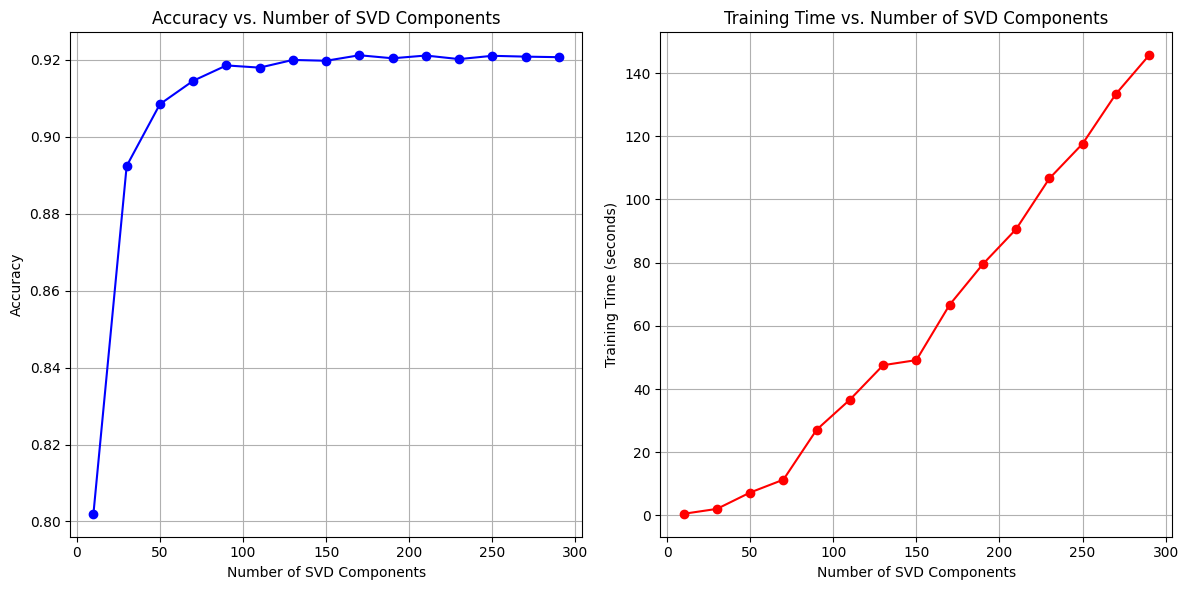

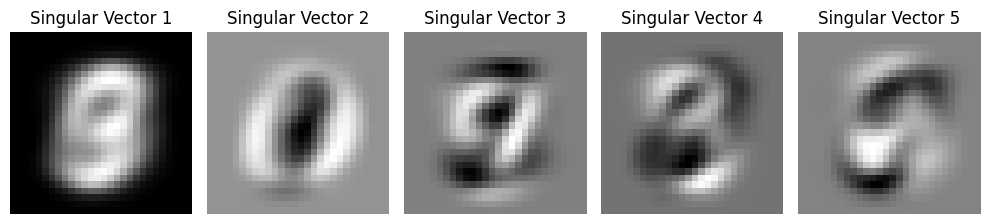

In [5]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
# Extract data for plotting
results = sorted(results, key=lambda x: x['components'])
components = [result['components'] for result in results]
accuracies = [result['accuracy'] for result in results]
times = [result['training_time'] for result in results]

# Plot Accuracy vs. Number of Components
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Accuracy vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Training Time vs. Number of Components
plt.subplot(1, 2, 2)
plt.plot(components, times, marker='o', linestyle='-', color='red')
plt.title('Training Time vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Visualize top 5 singular vectors reshaped into 28x28 images
# Assuming you have access to the singular vectors from SVD
U, S, Vt = np.linalg.svd(X_train, full_matrices=False)

# Visualize the top 5 singular vectors
top_singular_vectors = Vt[:5, :]  # Take the top 5 singular vectors

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    singular_vector_image = top_singular_vectors[i, :].reshape(28, 28)
    plt.imshow(singular_vector_image, cmap='gray')
    plt.title(f"Singular Vector {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

From the Accuracy vs. Number of SVD Component graph, we can find that the accuracy improves significantly as the number of SVD components increases from 10 to 50, reaching around 0.90. Beyond 90 components, the accuracy plateaus, showing only marginal improvement as the number of components increases. The peak accuracy seems to be around 0.92, with no significant gain beyond 130 components. This suggests that the most valuable information for the model is captured within the first 10-100 components, and additional components do not contribute much to improving accuracy.


From the Training Time vs. Number of SVD Component graph, we can find that the training time increases almost linearly as the number of components increases, with the time growing from almost negligible for very few components to over 140 seconds when using 300 components. At the 10 components, the training time is fastest, and it relatively slow increase utill 70 componments. There is a steep increase after 70 components, which indicates a significant computational cost with more components, without corresponding improvements in accuracy.

For the Singular vector graph, I think the the first singular vector (Singular Vector 1) captures the most dominant features. Subsequent singular vectors from 2 to 5 capture increasingly finer details, but they add marginally less value compared to the first singular vector.

In conclusion, based on the analysis of the graphs, 70-130 components seem to provide the best balance between performance (accuracy) and efficiency (training time). Around 70 components, you already achieve around 0.915, which close to the highest accuracy,and have relatively low runtime. Around 130 components, you approach the peak accuracy of around 0.92. Beyond 130 components, training time increases rapidly, but accuracy does not improve significantly.